<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#pySankey2-Demo" data-toc-modified-id="pySankey2-Demo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>pySankey2 Demo</a></span><ul class="toc-item"><li><span><a href="#Twolayer-Sankey" data-toc-modified-id="Twolayer-Sankey-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Twolayer-Sankey</a></span></li><li><span><a href="#Multilayer-Sankey" data-toc-modified-id="Multilayer-Sankey-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Multilayer-Sankey</a></span></li><li><span><a href="#How-does-the-kernelSize-affect-the-smoothness-of-the-strip？" data-toc-modified-id="How-does-the-kernelSize-affect-the-smoothness-of-the-strip？-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>How does the kernelSize affect the smoothness of the strip？</a></span></li></ul></li></ul></div>

# pySankey2 Demo

## Twolayer-Sankey

Let's quickly draw a 2-layer Sankey diagram

In [1]:
from pysankey2 import Sankey
from pysankey2.datasets import load_fruits

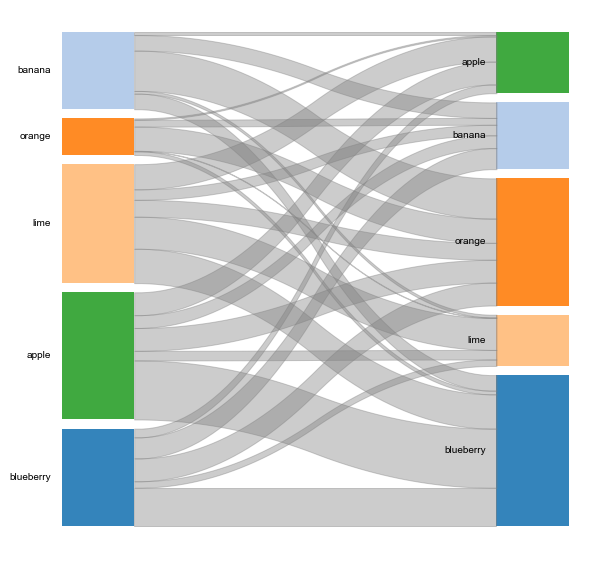

In [3]:
df = load_fruits()
sky_auto_global_colors = Sankey(df,colorMode="global")
fig,ax = sky_auto_global_colors.plot()

Sometimes we may want to DIY the relative order and color of each boxes.With a little more codes:

In [4]:
from pysankey2.utils import setColorConf

In [5]:
fruits = list(set(df.layer1).union(set(df.layer2)))

# Specified the colors
# Here, we use 'Pastel1' colormaps(a shy bust fresh colormap :)).
# See matplotlib cmap for more colormaps:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html"""
colors = setColorConf(len(fruits),colors='Pastel1')
cls_map = dict(zip(fruits,colors))

# Specified the relative order in each layer.
layer_labels= {'layer1':['apple','banana','blueberry', 'lime', 'orange'],
                        'layer2':['apple','banana','blueberry', 'lime', 'orange']}

print(fruits)
print(colors)
print(cls_map)

['blueberry', 'banana', 'orange', 'lime', 'apple']
['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6']
{'blueberry': '#fbb4ae', 'banana': '#b3cde3', 'orange': '#ccebc5', 'lime': '#decbe4', 'apple': '#fed9a6'}


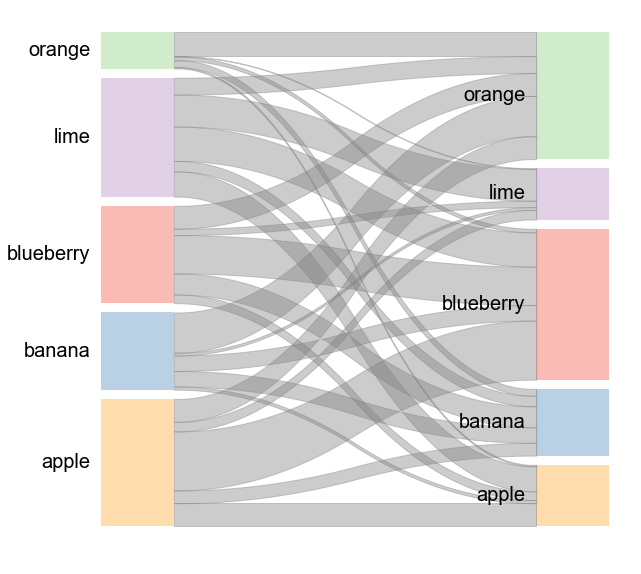

In [6]:
sky = Sankey(df,colorDict=cls_map,layerLabels = layer_labels,colorMode="global")
# set a bigger font size 
fig,ax = sky.plot(text_kws={'size':20})

In [13]:
"""inspect some properties in sankey object"""
print(sky.__dict__.keys())
print(sky.colorDict)
print(sky.colnameMaps)
print(sky.stripColor)

dict_keys(['dataFrame', '_colnameMaps', '_allLabels', '_layerLabels', 'colorMode', '_colorDict', '_stripColor', '_boxPos', '_layerPos', '_stripWidths'])
{'blueberry': '#fbb4ae', 'banana': '#b3cde3', 'orange': '#ccebc5', 'lime': '#decbe4', 'apple': '#fed9a6'}
{'layer1': 'layer1', 'layer2': 'layer2'}
grey


we can also set the strip color same with the left box:

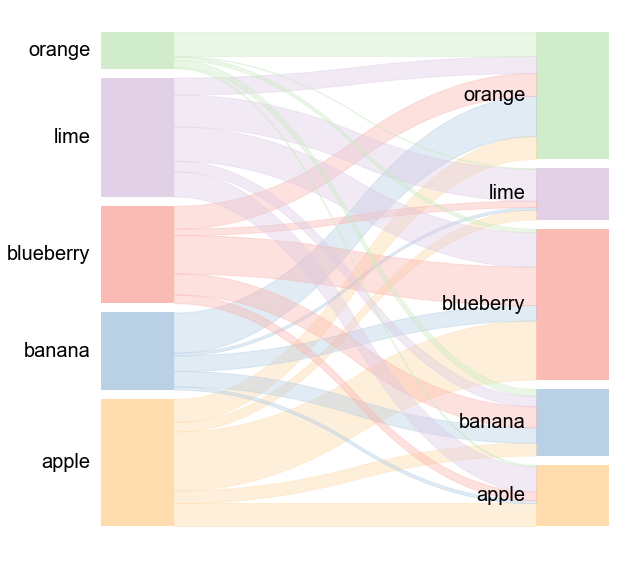

In [14]:
sky = Sankey(df,colorDict=cls_map,layerLabels = layer_labels,colorMode="global",stripColor='left')
# set a bigger font size 
fig,ax = sky.plot(text_kws={'size':20})

wow, pretty nice!

a layer specific colormap is also allowed:

In [15]:
fruits_l1 = list(set(df.layer1))
fruits_l2 =  list(set(df.layer2))
# Specified the colors
colors_l1 = setColorConf(len(fruits_l1),colors='Pastel1')
colors_l2 = setColorConf(len(fruits_l2),colors='Dark2')

cls_map_l1 = dict(zip(fruits_l1,colors_l1))
cls_map_l2 = dict(zip(fruits_l2,colors_l2))

cls_map = {'layer1':cls_map_l1,'layer2':cls_map_l2}

# Specified the relative order in each layer.
layer_labels= {'layer1':['apple','banana','blueberry', 'lime', 'orange'],
                        'layer2':['apple','banana','blueberry', 'lime', 'orange']}

print(cls_map)

{'layer1': {'blueberry': '#fbb4ae', 'banana': '#b3cde3', 'orange': '#ccebc5', 'lime': '#decbe4', 'apple': '#fed9a6'}, 'layer2': {'blueberry': '#1b9e77', 'banana': '#d95f02', 'orange': '#7570b3', 'lime': '#e7298a', 'apple': '#66a61e'}}


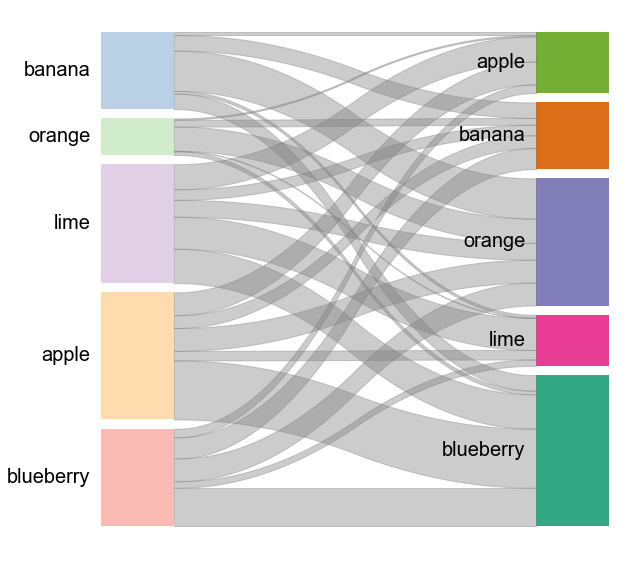

In [19]:
sky_auto_global_colors = Sankey(df,
                                colorDict=cls_map,
                                #layerLabels = layer_labels,
                                colorMode="layer")

# a bigger font size is nice.
fig,ax = sky_auto_global_colors.plot(text_kws={'size':20})

we can also set the strip color same with the left box:

## Multilayer-Sankey

In [5]:
from pysankey2 import Sankey
from pysankey2.datasets import load_countrys

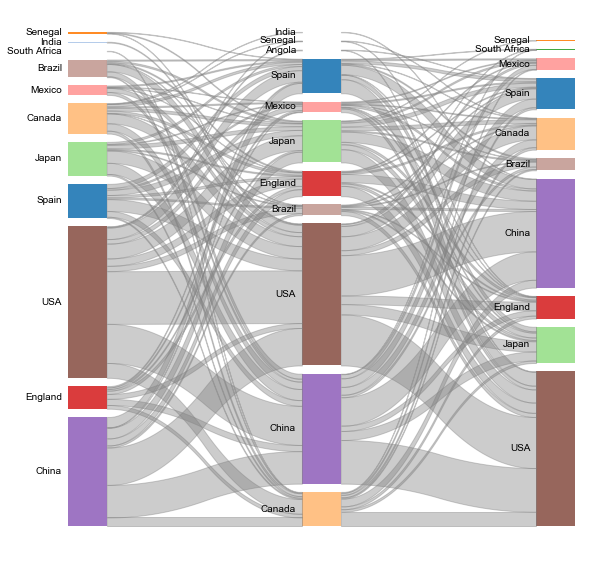

In [7]:
df = load_countrys()
sky_auto_global_colors = Sankey(df,colorMode="global")
fig,ax = sky_auto_global_colors.plot()

#plt.show()

## How does the kernelSize affect the smoothness of the strip？

The size of the convolution kernel will directly affect the smoothness of the strip. Intuitively, the larger the size, the wider the sliding window range, the easier it is to smooth. However, for the beauty of the strip, the kernel has an optimal range, I suggest kernelSize=20~30. Let's look at how different kernelSizes affect smoothness:

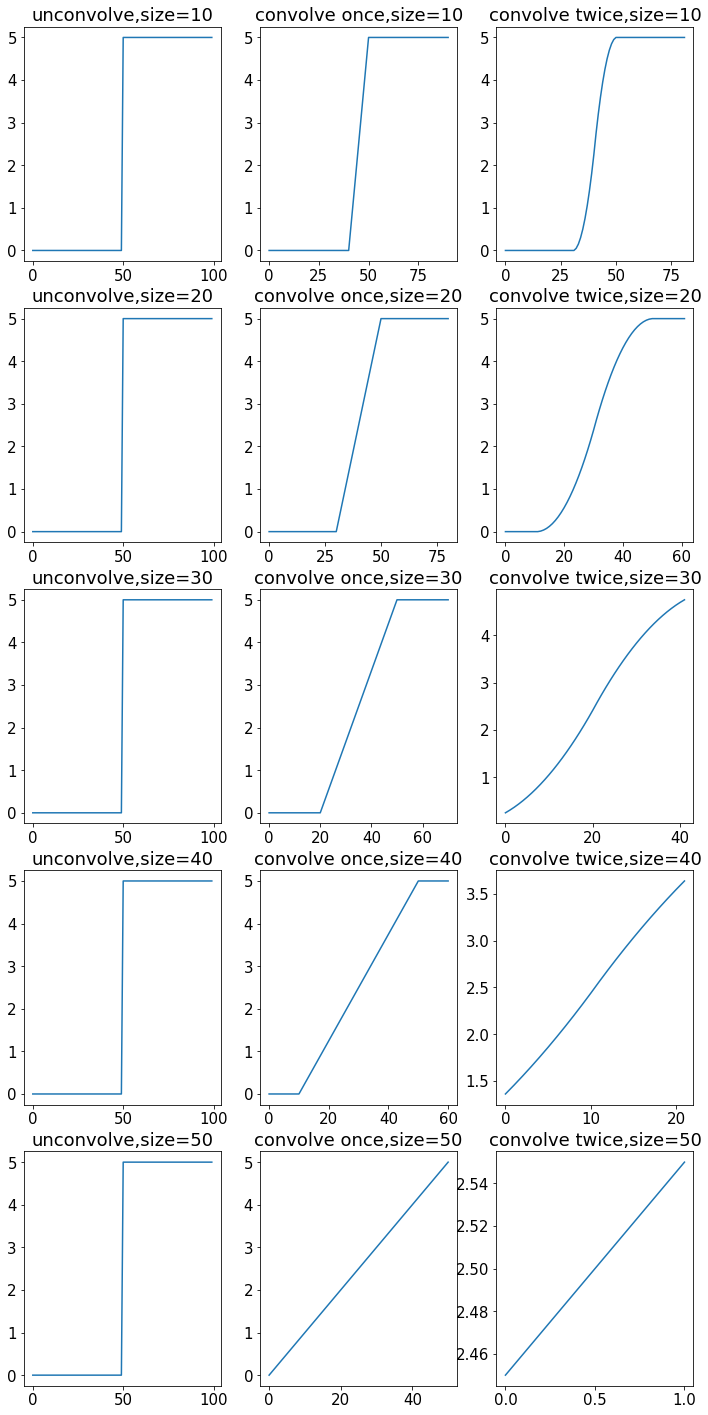

In [21]:
import matplotlib.pyplot as plt
import numpy as np

kernelSizes=[10,20,30,40,50]
plt.rc('font', size=15) 
plt.rc('font', serif='Arial') 
fig = plt.figure(figsize = [12,25])
fig.set_facecolor('white')

i=1
for kernelSize in kernelSizes:
    ys_c0 = np.array(50 * [0] + 50 * [5])
    ys_c1 = np.convolve(ys_c0  ,(1/kernelSize) * np.ones(kernelSize), mode='valid')
    ys_c2 = np.convolve(ys_c1 , (1/kernelSize) * np.ones(kernelSize), mode='valid')
    
    ax1 = fig.add_subplot(5,3,i)
    ax2 = fig.add_subplot(5,3,i+1)
    ax3 = fig.add_subplot(5,3,i+2)
    ax1.plot(ys_c0)
    ax2.plot(ys_c1)
    ax3.plot(ys_c2)
    ax1.set_title('unconvolve,size=' + str(kernelSize))
    ax2.set_title('convolve once,size=' + str(kernelSize))
    ax3.set_title('convolve twice,size=' + str(kernelSize))
    i = i+3